# Contents (Содержание)
**1) Diving into data (Знакомство с данными)**

**2) Vizualization (Визуализация)**

**3) CatBoostClassifier**

**4) Economic effect (Экономический эффект)**


In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 500)

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objs as go

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
#import plotly.express as px

import plotly.io as pio
pio.renderers.default='notebook'

# 1) Diving into data (Знакомство с данными)

In [2]:
# Author of this kaggle dataset had two synthetic features, so I dropped them before and made file "BankChurners_1.csv"
path = "/Users/salikh-khabibullin/Desktop/Pet_Project/BankChurn/"
data = pd.read_csv(path + "BankChurners_1.csv")
data.shape

(10127, 21)

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

# About Columns (Features)
1) **CLIENTNUM** - Client number. Unique identifier for the customer holding the account  (**ID клиента**)

2) **Attrition_Flag** - Existing and Attrited Customers (**Метка принадлежности к оттоку**)

3) **Customer_Age** - Demographic variable - Customer's Age in Years (**Возраст**)

4) **Gender** - M = Male, F = Female (**Пол**)

5) **Dependent_count** - Number of dependents (**Количество детей**)

6) **Education_Level** - Educational Qualification of the account holder (**Уровень образования**)

(example: high school, college graduate, etc.)

7) **Marital_Status** - Married, Single, Unknown (**Семейное положение**)

8) **Income_Category** - Annual Income Category of the account holder (**Категория дохода**)

(< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

9) **Card_Category** - Type of Card (Blue, Silver, Gold, Platinum) (**Категория карты**)

10) **Months_on_book** - Period of relationship with bank (**Как давно стал клиентом банка**)

11) **Total_Relationship_Count** - Total no. of products held by the customer (**"Количество продуктов банка у кдиента"**)

12) **Months_Inactive_12_mon** - Number of months inactive in the last 12 months (**Количество месяцев неактивности за последний год**)

13) **Contacts_Count_12_mon** - Number of Contacts in the last 12 months (**Количество контактов за последний год**)

14) **Credit_Limit** - Credit Limit on the Credit Card (**Кредитный лимит**)

15) **Total_Revolving_Bal**	- Total Revolving Balance on the Credit Card (**Общий возобновляемый остаток на кредитной карте**)

16) **Avg_Open_To_Buy** - Num Open to Buy Credit Line (Average of last 12 months) (**"Количество открытых для покупки кредитной линии за последний год"**)

17) **Total_Amt_Chng_Q4_Q1** - Num Change in Transaction Amount (Q4 over Q1) (**"Количественное изменение суммы транзакций относительно 2 периодов"**)
 
18) **Total_Trans_Amt** - Num Total Transaction Amount (Last 12 months) (**Общее сумма транзакций**)

19) **Total_Trans_Ct** - Num Total Transaction Count (Last 12 months) (**Общее количество транзакций**)

20) **Total_Ct_Chng_Q4_Q1** - Num Change in Transaction Count (Q4 over Q1) (**"Количество изменений в транзакциях относительно 2 периодов"**)

21) **Avg_Utilization_Ratio** - Num	Average Card Utilization Ratio (**Средний коэффициент использования**)

### Check for duplicate lines (clients).

### Проверим, есть ли повторяющиеся строки.

In [4]:
assert data["CLIENTNUM"].nunique() == data.shape[0], "There are duplicates"

In [5]:
data.set_index("CLIENTNUM", inplace = True)

In [6]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School        Unknown  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

### Remove from Features "Attrition_Flag" because it's a target.
### Не включаю "Attrition_Flag" - так как это целевая переменная.

In [8]:
Features = list(data.columns[1:])
print("Count (Количество) : ", len(Features))
print("Features (Признаки) :\n", Features)

Count (Количество) :  19
Features (Признаки) :
 ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [9]:
%%time

profile = ProfileReport(data[Features], title = "Summary")

CPU times: user 16 s, sys: 1.35 s, total: 17.4 s
Wall time: 16.2 s


In [10]:
#profile.to_file("Obzor.html") # you can save it as html-file
profile.to_notebook_iframe()

In [11]:
data["Attrition_Flag"] = data["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

In [12]:
X = data[Features]
y = data["Attrition_Flag"]

X.head()

Customer_Age Gender  Dependent_count Education_Level  \
CLIENTNUM                                                         
768805383            45      M                3     High School   
818770008            49      F                5        Graduate   
713982108            51      M                3        Graduate   
769911858            40      F                4     High School   
709106358            40      M                3      Uneducated   

          Marital_Status Income_Category Card_Category  Months_on_book  \
CLIENTNUM                                                                
768805383        Married     $60K - $80K          Blue              39   
818770008         Single  Less than $40K          Blue              44   
713982108        Married    $80K - $120K          Blue              36   
769911858        Unknown  Less than $40K          Blue              34   
709106358        Married     $60K - $80K          Blue              21   

           Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                     
768805383                         5                       1   
818770008                         6                       1   
713982108                         4                       1   
769911858                         3                       4   
709106358                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

In [13]:
y.head()

CLIENTNUM
768805383    0
818770008    0
713982108    0
769911858    0
709106358    0
Name: Attrition_Flag, dtype: int64

In [14]:
Num_cols = [cname for cname in Features if data[cname].dtype in ['int64', 'float64']]
Cat_cols = [cname for cname in Features if data[cname].dtype == "object"]

print("Number of Numeric features (Количество числовых признаков) : ", len(Num_cols))
print("Numeric (Числовые признаки) :\n ", Num_cols, " \n")

print("Number of Categorical features (Количество категориальных признаков) : ", len(Cat_cols))
print("Categorical (Категориальные признаки) :\n ", Cat_cols)

Number of Numeric features (Количество числовых признаков) :  14
Numeric (Числовые признаки) :
  ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']  

Number of Categorical features (Количество категориальных признаков) :  5
Categorical (Категориальные признаки) :
  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [15]:
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [16]:
y.value_counts()[0]/y.value_counts()[1]

5.224339274738783

### Class Ratio  is very different so there is imbalance and I decided to fight with it.
### Получается есть Дисбаланс классов.

# 2) Vizualization (Визуализация)

In [17]:
def build_plot(feature, title_rus):
    trace1 = go.Histogram(
        x = data[data["Attrition_Flag"] == 0][feature],
        name = "Existing Customer (0)",
        marker = dict(color = "blue", opacity = 0.6)
    )
    trace2 = go.Histogram(
        x = data[data["Attrition_Flag"] == 1][feature],
        name = "Attrited Customer (1)",
        marker = dict(color = "red", opacity = 0.8)
    )

    Traces = [trace1, trace2]
    layout = go.Layout(title = title_rus) 
    fig = go.Figure(data = Traces, layout = layout)
    return iplot(fig) 

In [18]:
Watching_Features = ["Income_Category", "Card_Category", "Customer_Age", "Marital_Status", 
                     "Education_Level", "Dependent_count", "Months_on_book",
                     "Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct"]
Titles_with_Rus = ["Income_Category / Доход", "Card_Category / Тип банковской карты", 
                   "Customer_Age / Возраст клиента", "Marital_Status / Семейное положение", 
                   "Education_Level / Уровень образования", "Dependent_count / Количество детей",
                   "Months_on_book / Как давно стал клиентом банка", "Credit_Limit / Кредитный Лимит",
                   "Total_Trans_Amt / Общая сумма транзакций", "Total_Trans_Ct / Общее количество транзакций"] 

#for a in Watching_Features:
#    build_plot(a, Titles_with_Rus[Watching_Features.index(a)])

In [19]:
build_plot("Income_Category", "Income_Category / Доход")

In [20]:
build_plot("Card_Category", "Card_Category / Тип банковской карты")

In [21]:
build_plot("Customer_Age", "Customer_Age / Возраст клиента")

In [22]:
build_plot("Marital_Status", "Marital_Status / Семейное положение")

In [23]:
build_plot("Education_Level", "Education_Level / Уровень образования")

In [24]:
build_plot("Dependent_count", "Dependent_count / Количество детей")

In [25]:
build_plot("Months_on_book", "Months_on_book / Как давно стал клиентом банка")

In [26]:
build_plot("Credit_Limit", "Credit_Limit / Кредитный Лимит")

In [27]:
build_plot("Total_Trans_Amt", "Total_Trans_Amt / Общая сумма транзакций")

In [28]:
build_plot("Total_Trans_Ct", "Total_Trans_Ct / Общее количество транзакций")

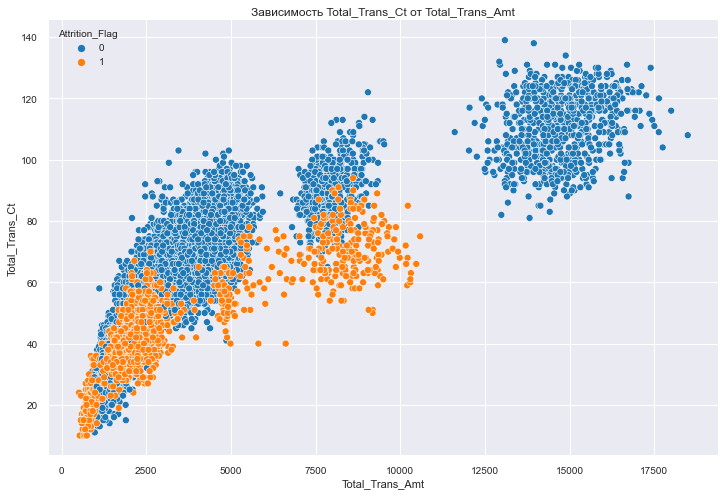

In [29]:
plt.figure(figsize = (12, 8))
plt.title("Зависимость Total_Trans_Ct от Total_Trans_Amt")
sns.scatterplot(data = data, x = "Total_Trans_Amt", y = "Total_Trans_Ct", hue = "Attrition_Flag");

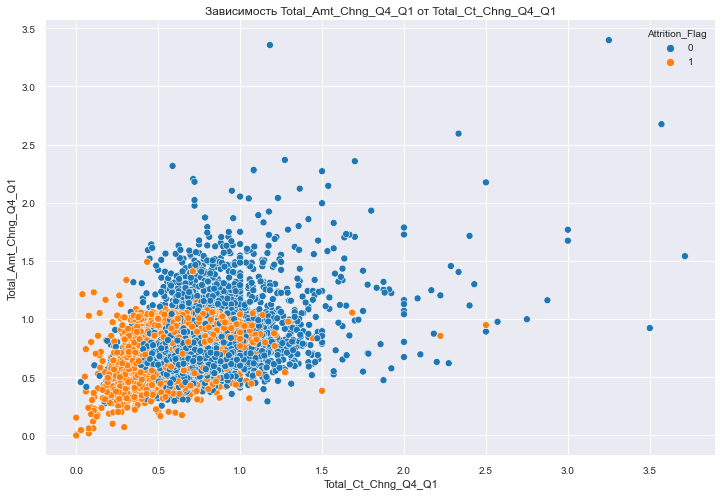

In [30]:
plt.figure(figsize = (12, 8))
plt.title("Зависимость Total_Amt_Chng_Q4_Q1 от Total_Ct_Chng_Q4_Q1")
sns.scatterplot(data = data, x = "Total_Ct_Chng_Q4_Q1", y = "Total_Amt_Chng_Q4_Q1" , hue = "Attrition_Flag");

# 3) CatBoostClassifier

### I know about <font color = 'blue'>LightGBMClassifier</font>  and <font color = 'green'>XGBoostClassifier</font>  (H2OGradientBoostingEstimator, GradientBoostingClassifier and others).
### but I prefer <font color='red'>CatBoostClassifier!</font> .
### Я предпочитаю CatBoostClassifier.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8101, 19) (8101,) (2026, 19) (2026,)


In [32]:
# But actually, it I may not use StandardScaler() if I use CatBoostClassifier
scaler = StandardScaler()

X_train[Num_cols] = scaler.fit_transform(X_train[Num_cols])
X_test[Num_cols] = scaler.transform(X_test[Num_cols])

In [33]:
# Я не стал вводить здесь Pipeline, так как нет пропущенных значений, 
# не применяю OneHotEncoder - так как применяю CatBoost
# ну и StandardScaler можно и не использовать здесь

In [34]:
params_1 = {'cat_features': Cat_cols,
            'verbose': 1000,
            'random_seed': 1}

model_Cat_1 = CatBoostClassifier(**params_1);
model_Cat_1.fit(X_train, y_train, 
                eval_set = (X_test, y_test),    
                use_best_model = True, 
                plot = True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053127
0:	learn: 0.6334559	test: 0.6336110	best: 0.6336110 (0)	total: 64.2ms	remaining: 1m 4s
999:	learn: 0.0123754	test: 0.0641535	best: 0.0638163 (933)	total: 5.67s	remaining: 0us

bestTest = 0.06381629446
bestIteration = 933

Shrink model to first 934 iterations.


### It's important for bank for find certainly all client from future churn.
### So we will evaluate models by Accuracy and F1 Score, which measure FP and FN cases.
### FalsePositive (FP) cases - when we define that these client are from future churn but they are not from Churn.
### FalseNegative (FN) cases - when we define that these client are not from future Churn but they are from Churn.
### It's import to define FN certainly.

### Для банка очень важно точно определить всех клиентов из будущего оттока.
### Поэтому будем оценивать модель по Точности (Accuracy) и F1-мере (F1 Score), которая определяет ### ЛП и ЛО случаи.
### ЛожноПоложительные (ЛП) случаи - случаи, когда мы определили, что эти клиенты из будущего оттока, а на самом деле нет.
### ЛожноНегативные (ЛН) случаи - случаи, когда мы определили. что это клиенты не из будущего оттока, а они из будущего оттока.
### Очень важно точно определить ЛН случаи.

In [35]:
%%time

Results = pd.DataFrame(columns = ["model", "roc_auc", "f1_micro"])

scores_r1 = cross_val_score(model_Cat_1, X_test, y_test, 
                            scoring = "roc_auc", 
                            cv = 5,
                            n_jobs = -1)

scores_r2 = cross_val_score(model_Cat_1, X_test, y_test, 
                            scoring = "f1_micro", 
                            cv = 5,
                            n_jobs = -1)

r1 = round(scores_r1.mean(), 6)
r2 = round(scores_r2.mean(), 6)

print("roc_auc", r1)
print("f1_micro", r2)
Results.loc[0] = ["Cat_1", r1, r2]

y_pred = model_Cat_1.predict(X_test)
print(classification_report(y_test, y_pred))

roc_auc 0.988673
f1_micro 0.961506
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1695
           1       0.94      0.90      0.92       331

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026

CPU times: user 73.2 ms, sys: 145 ms, total: 218 ms
Wall time: 13.6 s


In [36]:
params_2 = {'loss_function':'Logloss',
            'eval_metric':'AUC',
            'verbose': 1000,
            'cat_features': Cat_cols,
            'random_seed': 1,}

model_Cat_2 = CatBoostClassifier(**params_2);
model_Cat_2.fit(X_train, y_train, 
                eval_set = (X_test, y_test),    
                use_best_model = True, 
                plot = True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053127
0:	test: 0.8826110	best: 0.8826110 (0)	total: 6.7ms	remaining: 6.69s
999:	test: 0.9948845	best: 0.9949968 (350)	total: 5.79s	remaining: 0us

bestTest = 0.9949968363
bestIteration = 350

Shrink model to first 351 iterations.


In [37]:
%%time

scores_r1 = cross_val_score(model_Cat_2, X_test, y_test, 
                            scoring = "roc_auc", 
                            cv = 5,
                            n_jobs = -1)

scores_r2 = cross_val_score(model_Cat_2, X_test, y_test, 
                            scoring = "f1_micro", 
                            cv = 5,
                            n_jobs = -1)

r1 = round(scores_r1.mean(), 6)
r2 = round(scores_r2.mean(), 6)

print("roc_auc", r1)
print("f1_micro", r2)
Results.loc[1] = ["Cat_2", r1, r2]

y_pred = model_Cat_2.predict(X_test)
print(classification_report(y_test, y_pred))

roc_auc 0.988673
f1_micro 0.961506
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1695
           1       0.95      0.90      0.92       331

    accuracy                           0.98      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.98      0.98      0.98      2026

CPU times: user 29.9 ms, sys: 3.93 ms, total: 33.8 ms
Wall time: 10.7 s


### I will try SomteNC library.
### Решил попробовать Стратегию Smote (SmoteNC - с учётом категориальных данных)!!!

### More information about imbalance https://dyakonov.org/2021/05/27/imbalance/
### Подробнее о дисбалансе: https://dyakonov.org/2021/05/27/imbalance/

In [38]:
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

### SMOTE - library to work with imbalance and all Features must be in Numeric format.
### SMOTENC - library to work with imbalance and you can work wirh Categorical Features.

### SMOTE - библиотека для работы с дисбалансом и все признаки должны быть переведены в цифру.
### SMOTENC - библиотека для работы с дисбалансом и признаки могут быть категориальными.

In [39]:
Cat_cols

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [40]:
index_of_Cat = []

listik = list(X.columns)
for a in Cat_cols:
    index_of_Cat.append(listik.index(a))
print("Count (Количество) : ", len(index_of_Cat))
print("Index of Categorical (Индексы категориальных признаков) : ", index_of_Cat)

Count (Количество) :  5
Index of Categorical (Индексы категориальных признаков) :  [1, 3, 4, 5, 6]


In [41]:
smoteNC = SMOTENC(random_state=42, categorical_features = index_of_Cat)

X_smoteNC, y_smoteNC = smoteNC.fit_resample(X, y) 

print(f'''Shape of X before SMOTENC (Размер X до): {X.shape}
Shape of X after SMOTENC (Размер X после): {X_smoteNC.shape}''')

print('\nBalance of positive and negative classes (%): (Соотношение положительных и негативных случаев)')
y_smoteNC.value_counts(normalize=True) * 100

Shape of X before SMOTENC (Размер X до): (10127, 19)
Shape of X after SMOTENC (Размер X после): (17000, 19)

Balance of positive and negative classes (%): (Соотношение положительных и негативных случаев)


0    50.0
1    50.0
Name: Attrition_Flag, dtype: float64

In [42]:
X_train_smNC, X_test_smNC, y_train_smNC, y_test_smNC = train_test_split(X_smoteNC, y_smoteNC, test_size = 0.2, random_state = 1)
print(X_train_smNC.shape, y_train_smNC.shape, X_test_smNC.shape, y_test_smNC.shape)

(13600, 19) (13600,) (3400, 19) (3400,)


In [43]:
scaler = StandardScaler()

X_train_smNC[Num_cols] = scaler.fit_transform(X_train_smNC[Num_cols])
X_test_smNC[Num_cols] = scaler.transform(X_test_smNC[Num_cols])

In [44]:
params_3 = {'cat_features': Cat_cols,
            'verbose': 1000,
            'random_seed': 1,}

model_Cat_3 = CatBoostClassifier(**params_3);
model_Cat_3.fit(X_train_smNC, y_train_smNC, 
                eval_set = (X_test_smNC, y_test_smNC),    
                use_best_model = True, 
                plot = True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.06038
0:	learn: 0.6174961	test: 0.6175708	best: 0.6175708 (0)	total: 7.97ms	remaining: 7.96s
999:	learn: 0.0133494	test: 0.0437913	best: 0.0437758 (993)	total: 9.24s	remaining: 0us

bestTest = 0.04377581631
bestIteration = 993

Shrink model to first 994 iterations.


In [45]:
%%time

scores_r1 = cross_val_score(model_Cat_3, X_test_smNC, y_test_smNC, 
                            scoring = "roc_auc", 
                            cv = 5,
                            n_jobs = -1)

scores_r2 = cross_val_score(model_Cat_3, X_test_smNC, y_test_smNC, 
                            scoring = "f1_micro", 
                            cv = 5,
                            n_jobs = -1)

r1 = round(scores_r1.mean(), 6)
r2 = round(scores_r2.mean(), 6)

print("roc_auc", r1)
print("f1_micro", r2)
Results.loc[2] = ["Cat_3", r1, r2]

y_pred = model_Cat_3.predict(X_test_smNC)
print(classification_report(y_test_smNC, y_pred))

roc_auc 0.995795
f1_micro 0.972647
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1678
           1       0.98      0.99      0.99      1722

    accuracy                           0.98      3400
   macro avg       0.99      0.98      0.98      3400
weighted avg       0.99      0.98      0.98      3400

CPU times: user 44.4 ms, sys: 9.22 ms, total: 53.6 ms
Wall time: 13.2 s


In [46]:
Results.set_index("model", inplace = True)
Results

roc_auc  f1_micro
model                    
Cat_1  0.988673  0.961506
Cat_2  0.988673  0.961506
Cat_3  0.995795  0.972647

In [47]:
def plot_Importance(model):
    Feat_Importance = {"Names": Features, "Importance": model.get_feature_importance()}
    Import_Data = pd.DataFrame(Feat_Importance)
    Import_Data.sort_values(by = ["Importance"], ascending = False, inplace = True) 
    plt.figure(figsize = (15, 10))
    
    sns.barplot(x = Import_Data["Importance"], y = Import_Data["Names"])
    plt.title("Feature Importance / Важность признаков")
    plt.xlabel("Importance / Важность")
    plt.ylabel("Names / Признак")

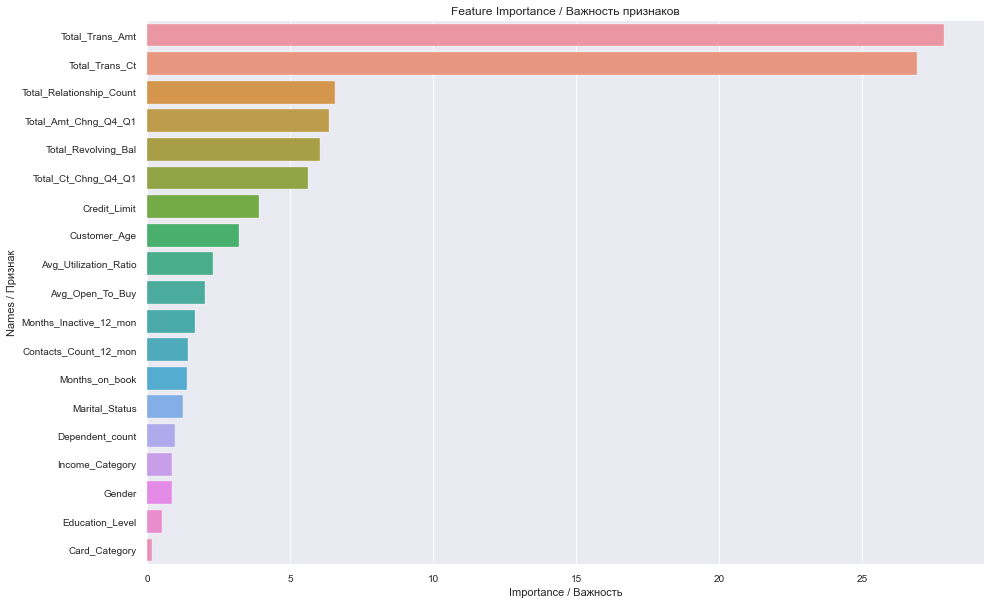

In [48]:
plot_Importance(model_Cat_3)

# 4) Economic effect (Экономический эффект)

In [49]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                         
768805383               0            45      M                3   
818770008               0            49      F                5   
713982108               0            51      M                3   
769911858               0            40      F                4   
709106358               0            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School        Unknown  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

In [50]:
data[data["Attrition_Flag"] == 1]["Income_Category"].value_counts()

Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64

In [51]:
Money_Churn = data[data["Attrition_Flag"] == 1]["Income_Category"].value_counts()

In [52]:
Money_Churn[0]

612

### I decided to calculate how much we lose in money,
### starting from the mean of the given money category and
### how many cases we have.

### Решил посчитать сколько теряем в деньгах, 
### отталкиваясь от среднего данной денежной категории и 
### количества таких случаев в этой категории.

### Suppose, that the bank makes in average 8-10% profit from one account.
### So <font color = "green">profit_koef = 0.08</font>.

### Предположим, что банк имеет 8-10 : прибыли с каждого счёта
### Поэтому <font color = "green">коэффициент_прибыли = 0.08 </font> (profit_koef).

In [53]:
profit_koef = 0.08
Summa = profit_koef*(Money_Churn[0]*20000 + Money_Churn[1]*50000 + Money_Churn[2]*100000 + Money_Churn[3]*70000 + \
        Money_Churn[5]*120000 + Money_Churn[4]*20000)
print("Summa : ", Summa)

Summa :  6566400.0


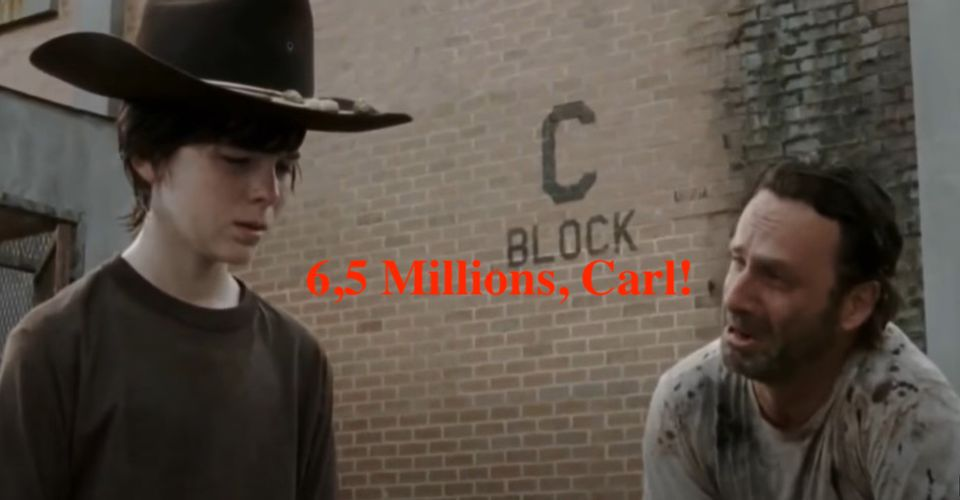

In [54]:
from IPython.display import Image
Image(filename = "Carl_Meme.jpg")

### Strategy: allocate some money to retain (some part of the future churn).
### Bank can find out the reasons for the churn and offer more comfortable service!

### Стратегия борьбы : выделить некоторые средства для удержания (некоторой части из будущего оттока).
### путём выяснения причин оттока и предложения тарифа на более выгодных условиях!

### <font color = "blue"> Thanks for reading. </font> 
### <font color = "blue"> Спасибо за внимание. </font>  